## fiTQun e/pi0 discrimination

This notebook was created to compare the performance of fiTQun to CNN for e/pi0 discrimination

In [1]:
from __future__ import print_function
from IPython.display import display
import torch, time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
myFQData = np.load('/data/hkml_data/fiTQun/IWCDgrid/varyAll/pi0/IWCDgrid_varyAll_pi0_20-2000MeV_100evts_9.fiTQun.npz')
myFQList = myFQData.files

In [3]:
myFQeData = np.load('/data/hkml_data/fiTQun/IWCDgrid/varyAll/e-/IWCDgrid_varyAll_e-_20-2000MeV_100evts_9.fiTQun.npz')

In [4]:
print(len(myFQData['fqpi0mass']))
for event in range(6):
    print(myFQData['fqpi0mass'][event][0])

100
60.04059982299805
116.56013488769531
13.888847351074219
95.9423828125
126.1881332397461
31.74525260925293


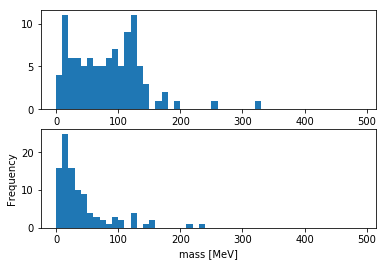

In [5]:
fig, axes = plt.subplots(2)

pi0mass = []
for event in range(len(myFQData['fqpi0mass'])):
    pi0mass.append(myFQData['fqpi0mass'][event][0])

axes[0].hist(pi0mass,bins=np.arange(0.,500.,10.))


pi0mass = []
for event in range(len(myFQeData['fqpi0mass'])):
    pi0mass.append(myFQeData['fqpi0mass'][event][0])

axes[1].hist(pi0mass,bins=np.arange(0.,500.,10.))
plt.xlabel("mass [MeV]")
plt.ylabel("Frequency");


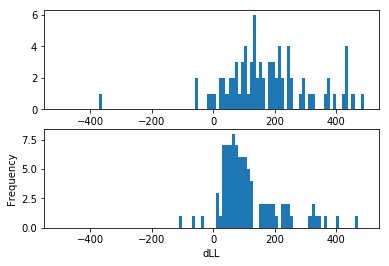

In [6]:
fig, axes = plt.subplots(2)

dll = []
for event in range(len(myFQData['fq1rnll'])):
    dll.append(-1.*(myFQData['fqpi0nll'][event][0]-myFQData['fq1rnll'][event][0][1]))

axes[0].hist(dll,bins=np.arange(-500.,500.,10.))

dll = []
for event in range(len(myFQeData['fq1rnll'])):
    dll.append(-1.*(myFQeData['fqpi0nll'][event][0]-myFQeData['fq1rnll'][event][0][1]))

axes[1].hist(dll,bins=np.arange(-500.,500.,10.))

plt.xlabel("dLL")
plt.ylabel("Frequency");

In [40]:
def getEventData(iEvent,particle='e-',type='data'):
    eventData = []
    dataLabels = []
    selected = True
    
    dataLabels.append('particle')
    if type=='data':
        eventData.append(particle)
        
    dataLabels.append('E')
    if type=='data':
        eventData.append(myData['energies'][iEvent][0])
    
    dataLabels.append('fqpi0mass')
    if type=='data':
        eventData.append(myFQData['fqpi0mass'][iEvent][0])

    dataLabels.append('dLL')
    if type=='data':
        eventData.append(-1.*(myFQData['fqpi0nll'][iEvent][0]-myFQData['fq1rnll'][iEvent][0][1]))
        
    dataLabels.append('barrelQ')
    if type=='data':
        eventData.append(np.sum(myData['event_data'][iEvent,:,:,0]))
    
    dataLabels.append('fqtotq')
    if type=='data':
        eventData.append(myFQData['fqtotq'][iEvent][0])
        
    dataLabels.append('barrelFrac')
    bFrac = 0
    if type=='data':
        bFrac = np.sum(myData['event_data'][iEvent,:,:,0])/(0.01+myFQData['fqtotq'][iEvent][0])
        eventData.append(bFrac)
        
    selected = bFrac > 0.85
        
    if type=='data':    
        return eventData,selected
    else:
        return dataLabels
    

In [41]:
# create a pandas dataframe - indexed by a unique event number formed by:
# e- runs: 1,000,000 + fnum*100 + iEvent
# pi0 runs: 2,000,000 + fnum*100 + iEvent

index = []
eventsData = []

particles = ['e-','pi0']
#particles = ['e-']
fnums = range(100)

for iParticle in range(len(particles)):
    particle = particles[iParticle]
    for fnum in fnums:
        myFQData = np.load('/data/hkml_data/fiTQun/IWCDgrid/varyAll/'+particle+'/IWCDgrid_varyAll_'+particle+'_20-2000MeV_100evts_'+str(fnum)+'.fiTQun.npz')
        myData = np.load('/data/hkml_data/IWCDgrid/varyAll/'+particle+'/IWCDgrid_varyAll_'+particle+'_20-2000MeV_100evts_'+str(fnum)+'.npz')
        nEvent = 100
        for iEvent in range(nEvent):
            eventNumber = (iParticle+1)*1000000 + fnum*100 + iEvent

            eventData,selected = getEventData(iEvent,particle=particle)
            if selected:
                index.append(eventNumber)
                eventsData.append(eventData)
    

df = pd.DataFrame(eventsData, index=index, columns=getEventData(0,type='labels'))
    

In [21]:
#df

In [ ]:
for i in range(10,20):
    plt.imshow(myData['event_data'][i,:,:,0])
    plt.show()
    print(df.index.values[i],df['barrelQ'].values[i],df['fqtotq'].values[i],df['barrelQ'].values[i]/df['fqtotq'].values[i])

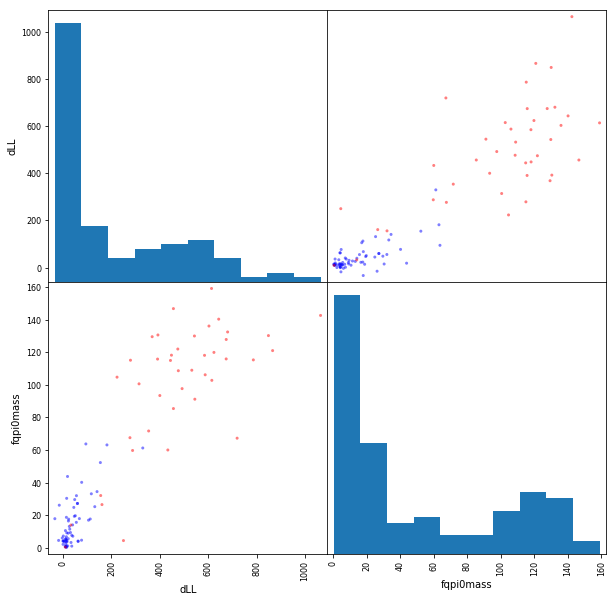

In [29]:
edf = df[df.E<300.]
pedf = edf[edf.particle!='xx']

col = pedf.particle.map({'e-':'b', 'pi0':'r'})
#df.plot.scatter(x='field_1', y='field_2', c=col)

pd.plotting.scatter_matrix(pedf[['dLL', 'fqpi0mass']],figsize=[10,10],c=col);

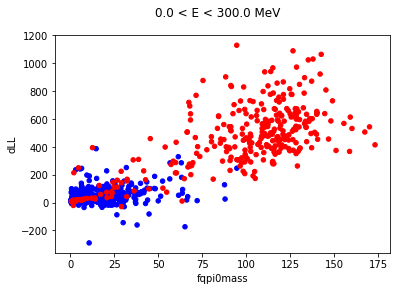

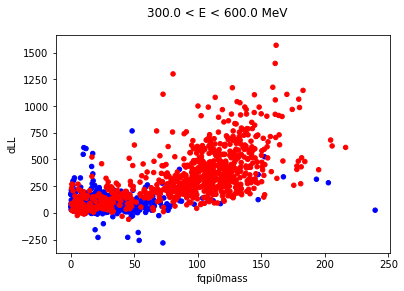

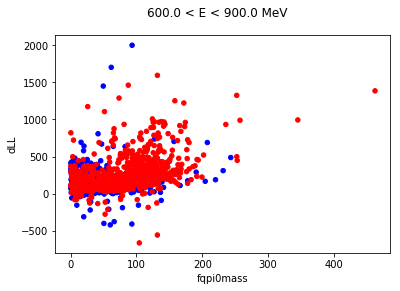

In [43]:
eBins =[0.,300.,600.,900.]

for iE in range(len(eBins)-1):
    edf = df[df.E>eBins[iE]]
    eedf = edf[edf.E<eBins[iE+1]]
    col = eedf.particle.map({'e-':'b', 'pi0':'r'})
    eedf.plot.scatter(x='fqpi0mass', y='dLL', c=col)
    plt.suptitle(str(eBins[iE])+' < E < '+str(eBins[iE+1])+' MeV')
    plt.show()

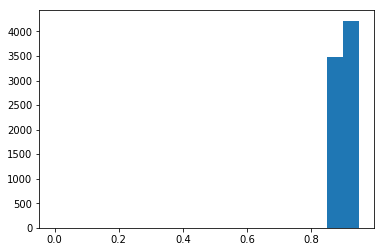

In [42]:
bq = df['barrelQ'].values
fqtq = df['fqtotq'].values
ratio = np.divide(bq,fqtq)

fig, axes = plt.subplots()
plt.hist(ratio,bins=np.arange(0.,1.,0.05))
plt.show()

## fiTQun performance

Define very simple cuts to demonstrate power of dLL and pi0mass (and a combination)

* 1: fqpi0mass > 50
* 2: dLL > 200
* 3: dLL/400 + fqpi0mass/100 > 1.

In [56]:
results_e = []
results_pi0 = []

for iE in range(len(eBins)-1):
    num_e = np.zeros(4)
    num_pi0 = np.zeros(4)
    
    edf = df[(df.E>eBins[iE]) & (df.E<eBins[iE+1])]
    total = edf['E'].count()
    num_e[0] = edf[edf.particle=='e-']['E'].count()
    num_pi0[0] = edf[edf.particle=='pi0']['E'].count()
    
    num_e[1] = edf[(edf.particle=='e-') & (edf.fqpi0mass>50.)]['E'].count()
    num_pi0[1] = edf[(edf.particle=='pi0') & (edf.fqpi0mass>50.)]['E'].count()
    
    num_e[2] = edf[(edf.particle=='e-') & (edf.dLL>200.)]['E'].count()
    num_pi0[2] = edf[(edf.particle=='pi0') & (edf.dLL>200.)]['E'].count()
    
    num_e[3] = edf[(edf.particle=='e-') & ((edf.fqpi0mass/100.+edf.dLL/400.)>1.)]['E'].count()
    num_pi0[3] = edf[(edf.particle=='pi0') & ((edf.fqpi0mass/100.+edf.dLL/400.)>1.)]['E'].count()
    
    result_e = []
    result_pi0 = []
    for i in range(4):
        result_e.append(num_e[i])
        result_pi0.append(num_pi0[i])
    
    results_e.append(result_e)
    results_pi0.append(result_pi0)
    


In [61]:
# 3 energy bins, 4 cut types
for iE in range(4):
    print('e',iE,results_e[iE])
    print('pi0',iE,results_pi0[iE])

e 0 [710.0, 17.0, 10.0, 7.0]
pi0 0 [308.0, 266.0, 267.0, 267.0]
e 1 [786.0, 77.0, 43.0, 34.0]
pi0 1 [819.0, 641.0, 570.0, 638.0]
e 2 [831.0, 197.0, 111.0, 112.0]
pi0 2 [834.0, 623.0, 474.0, 599.0]


IndexError: list index out of range

In [53]:
edf[edf.particle=='e-']['E'].count()


710